# Dual Plane Analysis

### Notebook for processing and analyzing dual plane somatic and dendritic recordings

In [ ]:
import os
import numpy as np
from Lab_Analyses.Dual_Plane.organize_dual_plane_data import organize_dual_plane_data
from Lab_Analyses.Dual_Plane.analyze_dual_plane_data import analyze_dual_plane_data
from Lab_Analyses.Dual_Plane import plot_dual_plane_data as plotting
from Lab_Analyses.Utilities.save_load_pickle import load_pickle, save_pickle
%matplotlib notebook

### Datasets
Specify which mice to be analyzed

In [ ]:
# Mouse ids
id_1 = "JW129"
id_2 = "JW130"
id_3 = "JW152"

mouse_list = [id_1, id_2]


### Data Organization
Organize the dual plane data

In [ ]:
# Reprocess?
reprocess = True

# Inputs
data_dir = "two_plane"
file_types = {"Dendrite": "dendrite", "Soma": "soma"}

# Preprocess data
for mouse in mouse_list:
    organize_dual_plane_data(mouse_id=mouse, data_dir=data_dir, file_types=file_types, reprocess=reprocess, save=True)

### Analyze dual plane data

In [ ]:
# Save path
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
dual_plane_dir = "Dual_Plane"
dual_plane_path = os.path.join(group_path, experiment_dir, dual_plane_dir)

# Analyze
reanalyze = True
if reanalyze:
    dual_plane_data = analyze_dual_plane_data(mouse_list, save=True, save_path=dual_plane_path)
else:
    dual_plane_data = load_pickle(["analyzed_dual_plane_data"], path=dual_plane_path)[0]

### Visualize Data

In [ ]:
# Set up figure save path
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
fig_path = os.path.join(initial_path, experiment_dir, dual_plane_dir)
if not os.path.isdir(fig_path):
    os.makedirs(fig_path)

In [ ]:
# Plot the traces
plotting.plot_soma_dend_traces(
    dual_plane_data,
    colors=["forestgreen", "black"],
    norm=False,
    subselect=None, 
    save=False, 
    save_path=fig_path,
)

In [ ]:
# Plot fraction coactivity
plotting.plot_soma_dend_coactivity(
    dual_plane_data,
    colors=["black", "forestgreen"],
    mean_type="mean", 
    err_type="sem",
    norm=False,
    trace_avg="all",
    figsize=(4,4),
    save=False,
    save_path=fig_path,
)

In [ ]:
# Plot paired event amplitudes
plotting.plot_amplitude_correlations(
    dual_plane_data,
    norm=True,
    dend_examples=[1,6],
    soma_examples=[1,6],
    color=["black", "black"],
    figsize=(11, 5.5),
    corr_lim=(0,1.2),
    s_size=25,
    s_alpha=0.8,
    bins=15,
    save=False,
    save_path=fig_path,
)

In [ ]:
from Lab_Analyses.Spine_Analysis_v2.preprocess_spine_data import organize_dual_spine_data

In [ ]:
from Lab_Analyses.Utilities.data_utilities import pad_array_to_length

In [ ]:
mouse_id = "JW130"
organize_dual_spine_data(mouse_id, channels={"GluSnFr": "GreenCh", "Calcium": "RedCh"},
    fov_type="apical",
    redetection=False,
    reprocess=False,
    save=True,
    followup=True,)

In [ ]:
from Lab_Analyses.Utilities.save_load_pickle import load_pickle
path = r"C:\Users\Jake\Desktop\Analyzed_data\individual\JW130\spine_data_test\FOV1_apical"
fname1 = "JW130_FOV1_apical_Early_dual_spine_data.pickle"
fname2 = "JW130_FOV1_apical_Middle_dual_spine_data.pickle"
fname3 = "JW130_FOV1_apical_Late_dual_spine_data.pickle"
files = load_pickle([fname1, fname2, fname3], path=path)

In [ ]:
f1 = files[0]
f2 = files[1]
f3 = files[2]

In [ ]:
f1.spine_groupings

In [ ]:
f1.spine_positions

In [ ]:
from Lab_Analyses.Spine_Analysis_v2.structural_plasticity import calculate_spine_dynamics

In [ ]:
calculate_spine_dynamics([f1.spine_flags,f2.spine_flags, f3.spine_flags], 
                         [f1.spine_positions,f2.spine_positions, f3.spine_positions], 
                         [f1.spine_groupings,f2.spine_groupings, f3.spine_groupings])

In [ ]:
a["Hello"]["World"] = 26

In [ ]:
from dataclasses import dataclass

@dataclass
class A:
    a: int
    b: int
    show: str
        
    def save(self):

        print(self.show)

In [ ]:
from Lab_Analyses.Utilities.save_load_pickle import load_pickle

load_pickle(["Hellow_World"])

In [1]:
from Lab_Analyses.Spine_Analysis_v2.spine_volume_normalization import batch_spine_volume_normalization

4.6844022999999995


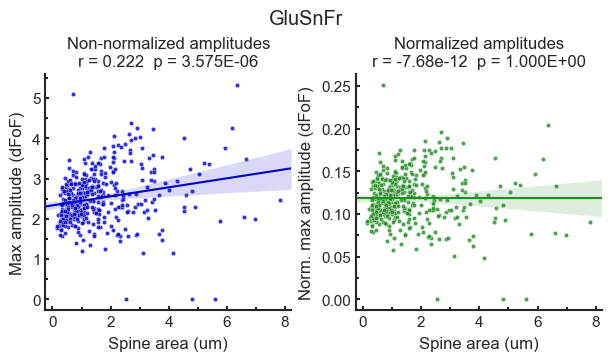

In [2]:
# Mouse ids
id_1 = "JW082"
id_2 = "JW083"
id_3 = "JW090"
id_4 = "JW092"
id_5 = "JW126"
id_6 = "JW129"
id_7 = "JW130"
id_8 = "JW150"
mouse_list = [id_1, id_2, id_3, id_4, id_5, id_6, id_7, id_8]
from timeit import default_timer as timer

start = timer()
batch_spine_volume_normalization(mouse_list, "Early", "apical", "GluSnFr", plot=True, zscore=True)
end = timer()
print(end - start) # Time in seconds, e.g. 5.38091952400282


In [3]:
import numpy as np
a = np.array([True, False, True])
b = np.array([True, True, True])

In [7]:
(b.astype(int) - a.astype(int)).astype(bool)

array([False,  True, False])

In [11]:
from dataclasses import dataclass
@dataclass
class A:
    a: np.ndarray
    b: np.ndarray

In [12]:
a = A(a=np.array([1,1]), b=np.array([2,2]))
b = A(a=np.array([3,3]), b=np.array([4,4]))

In [33]:
class  C:
    def __init__(self, data_list):
        attributes = list(data_list[0].__dict__.keys())
        for i, data in enumerate(data_list):
            for attribute in attributes:
                var = getattr(data, attribute)
                if i == 0:
                    setattr(self, attribute, var)
                else:
                    old_var = getattr(self, attribute)
                    print(type(old_var))
                    print(type(var))
                    
                    new_var = np.concatenate((getattr(self, attribute), var))
                    setattr(self, attribute, new_var)
                    pass

In [34]:
c = C([a,b])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [35]:
c.a

array([1, 1, 3, 3])